In [ ]:
# ------------------------------------------------------------------
# Import required libraries
# ------------------------------------------------------------------

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys

In [2]:
# ------------------------------------------------------------------
# Repository setup and src imports
# ------------------------------------------------------------------

# Set path to the repo root and src folder
repo_root = Path("/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository")
src_path = repo_root / "src"
sys.path.append(str(src_path))

# Import community detection model
from rice_ml.unsupervised_learning.community_detection import CommunityDetector

In [3]:
# ------------------------------------------------------------------
# Step 1: Load dataset and initial inspection
# ------------------------------------------------------------------

# Load dataset (same data folder as income dataset)
data_path = repo_root / "data" / "Obesity_Dataset.csv"
df = pd.read_csv(data_path)

# Basic inspection
print("Dataset shape:", df.shape)
display(df.head())

# Data types
print("\nData types:")
display(df.dtypes)

# Missing values check
print("\nMissing values per column:")
display(df.isnull().sum())

# Reference label distribution (not used for training)
print("\nDistribution of NObeyesdad:")
display(df["NObeyesdad"].value_counts())


Dataset shape: (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Data types:


Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Missing values per column:


Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Distribution of NObeyesdad:


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

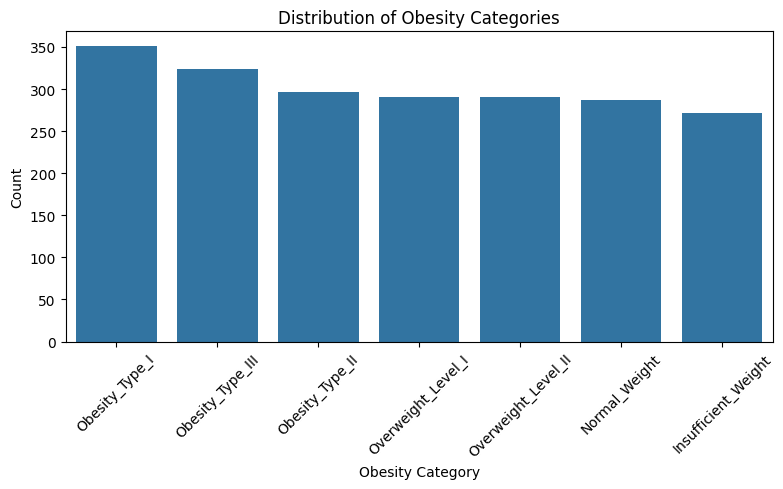

In [ ]:
# ------------------------------------------------------------------
# Distribution of Obesity Categories
# ------------------------------------------------------------------

# This plot shows the distribution of the obesity categories.
# Although community detection is unsupervised, understanding
# the target distribution helps later interpret whether detected
# communities align with known obesity groups.

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="NObeyesdad",
    order=df["NObeyesdad"].value_counts().index
)
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


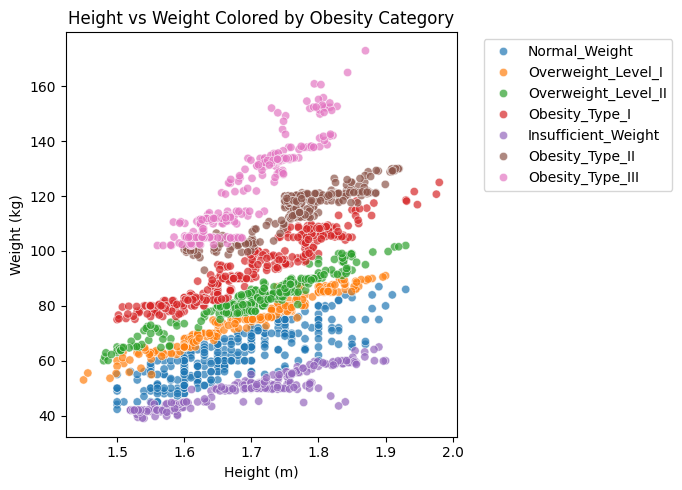

In [5]:
# ------------------------------------------------------------------
# Height vs Weight by Obesity Category
# ------------------------------------------------------------------

# This scatter plot shows the relationship between height and weight.
# Graph-based community detection relies on similarity structure,
# and this visualization helps reveal natural groupings in feature space.

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="Height",
    y="Weight",
    hue="NObeyesdad",
    palette="tab10",
    alpha=0.7
)
plt.title("Height vs Weight Colored by Obesity Category")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [7]:
# ------------------------------------------------------------------
# Step 2: Data preprocessing for community detection
# ------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
import pandas as pd

# ------------------------
# Separate features and labels (labels only for later interpretation)
# ------------------------

X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

# ------------------------
# Encode categorical variables
# ------------------------

X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded feature matrix shape:", X_encoded.shape)

# ------------------------
# Standardize features
# (important for distance-based graph construction)
# ------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Scaled feature matrix shape:", X_scaled.shape)


Encoded feature matrix shape: (2111, 23)
Scaled feature matrix shape: (2111, 23)


In [9]:
# ------------------------------------------------------------------
# Step 3: k-NN graph construction and community detection
# ------------------------------------------------------------------

# Initialize community detector
community_detector = CommunityDetector(
    n_neighbors=10,   # controls graph density
    random_state=42
)

# Fit model and detect communities
community_labels = community_detector.fit_predict(X_scaled)

# Attach community labels to original dataframe
df_with_communities = df.copy()
df_with_communities["community"] = community_labels

# ------------------------
# Inspect results
# ------------------------

print("Number of detected communities:", df_with_communities["community"].nunique())

print("\nCommunity size distribution:")
print(df_with_communities["community"].value_counts().sort_index())

# Preview results
df_with_communities.head()


Number of detected communities: 24

Community size distribution:
community
0      11
1     201
2     105
3      77
4      71
5      43
6      91
7     111
8      38
9     105
10    146
11     60
12     49
13    116
14     52
15    100
16     68
17    116
18    167
19     57
20    122
21     63
22     88
23     54
Name: count, dtype: int64


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,community
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,2
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,5
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,11
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,14
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2


In [10]:
# ------------------------------------------------------------------
# Step 4: Community interpretation vs obesity categories
# ------------------------------------------------------------------

# Create contingency table between communities and obesity labels
community_vs_obesity = pd.crosstab(
    df_with_communities["community"],
    df_with_communities["NObeyesdad"]
)

print("Community vs Obesity Category (counts):")
community_vs_obesity


Community vs Obesity Category (counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
community,,,,,,,
0,0,6,3,0,0,1,1
1,23,15,25,2,0,66,70
2,4,29,3,2,0,7,60
3,47,24,2,1,0,1,2
4,19,18,2,0,0,30,2
5,1,13,5,15,1,3,5
6,0,6,43,1,0,40,1
7,61,38,2,1,1,3,5
8,37,1,0,0,0,0,0


In [11]:
# Normalize rows to proportions
community_vs_obesity_prop = community_vs_obesity.div(
    community_vs_obesity.sum(axis=1),
    axis=0
)

community_vs_obesity_prop

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
community,,,,,,,
0,0.000000,0.545455,0.272727,0.000000,0.000000,0.090909,0.090909
1,0.114428,0.074627,0.124378,0.009950,0.000000,0.328358,0.348259
2,0.038095,0.276190,0.028571,0.019048,0.000000,0.066667,0.571429
3,0.610390,0.311688,0.025974,0.012987,0.000000,0.012987,0.025974
4,0.267606,0.253521,0.028169,0.000000,0.000000,0.422535,0.028169
5,0.023256,0.302326,0.116279,0.348837,0.023256,0.069767,0.116279
6,0.000000,0.065934,0.472527,0.010989,0.000000,0.439560,0.010989
7,0.549550,0.342342,0.018018,0.009009,0.009009,0.027027,0.045045
8,0.973684,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# ------------------------------------------------------------------
# Step 5: Community feature summary
# ------------------------------------------------------------------

# Add community labels to the original dataset
df_with_communities = df.copy()
df_with_communities["community"] = community_labels

# Compute mean of numeric features per community
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
community_feature_summary = df_with_communities.groupby("community")[numeric_features].mean()

# Optionally, you can also see categorical feature distributions
categorical_features = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS"]
community_categorical_summary = df_with_communities.groupby("community")[categorical_features].agg(lambda x: x.value_counts().index[0])

# Display summaries
print("Numeric feature averages per community:")
community_feature_summary

print("\nMost common categorical feature values per community:")
community_categorical_summary


Numeric feature averages per community:

Most common categorical feature values per community:


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS
community,,,,,,,,
0,Male,Sometimes,yes,no,no,yes,Sometimes,Motorbike
1,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation
2,Female,no,no,no,no,yes,Sometimes,Public_Transportation
3,Female,no,yes,no,no,yes,Frequently,Public_Transportation
4,Female,Sometimes,yes,yes,no,no,Sometimes,Public_Transportation
5,Male,Sometimes,yes,no,yes,yes,Sometimes,Public_Transportation
6,Female,Sometimes,yes,no,no,yes,Sometimes,Automobile
7,Female,Sometimes,yes,no,no,no,Frequently,Public_Transportation
8,Male,no,yes,no,no,yes,Sometimes,Automobile


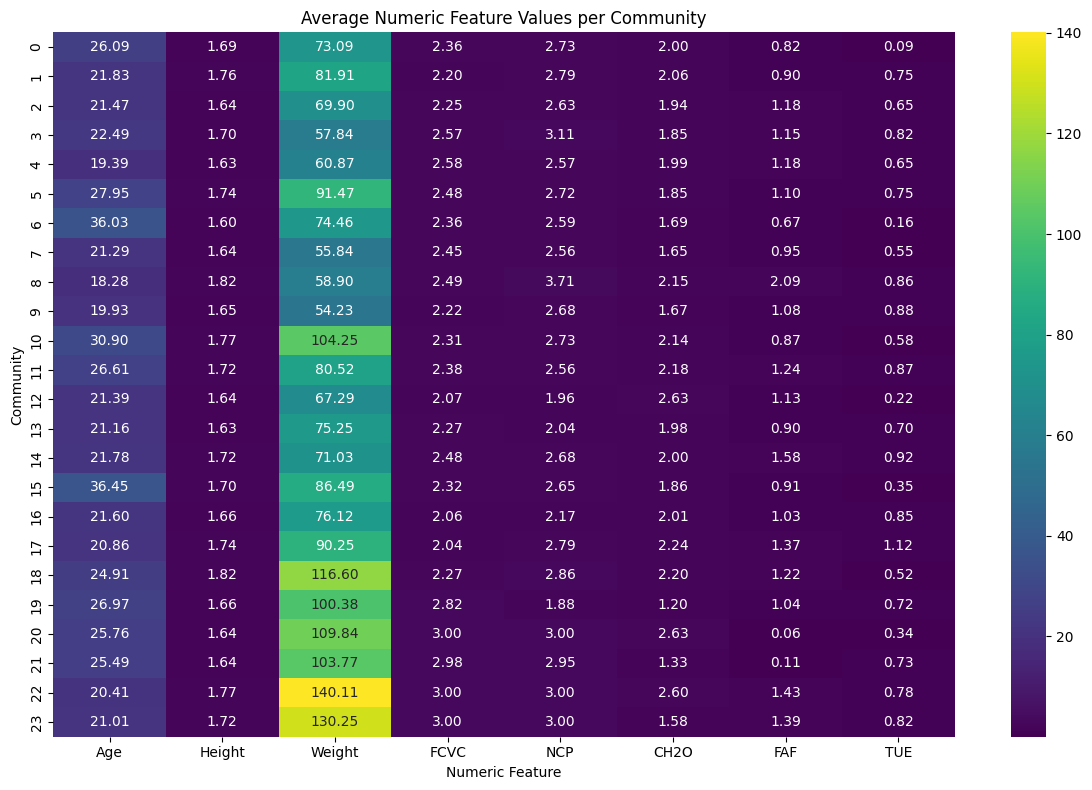

In [ ]:
# ------------------------------------------------------------------
# Step 6a: Heatmap - numeric features per community
# ------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    community_feature_summary,
    cmap="viridis",
    annot=True,
    fmt=".2f"
)
plt.title("Average Numeric Feature Values per Community")
plt.xlabel("Numeric Feature")
plt.ylabel("Community")
plt.tight_layout()
plt.show()


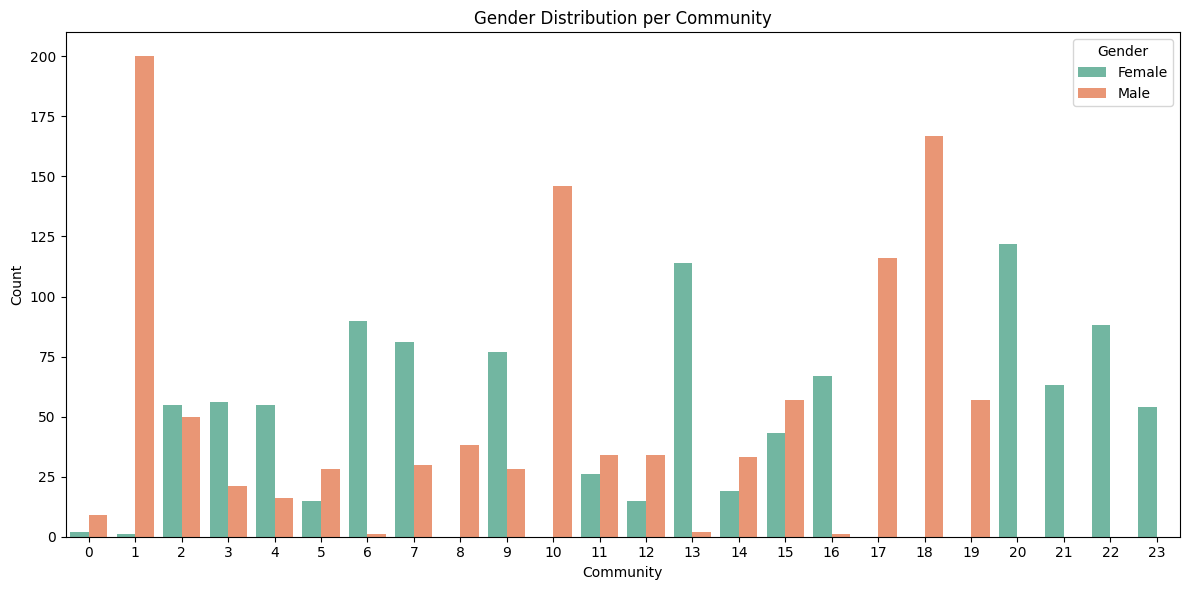

In [ ]:
# ------------------------------------------------------------------
# Step 6b: Barplot - categorical features per community (example: Gender)
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(
    x="community",
    hue="Gender",
    data=df_with_communities,
    palette="Set2"
)
plt.title("Gender Distribution per Community")
plt.xlabel("Community")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


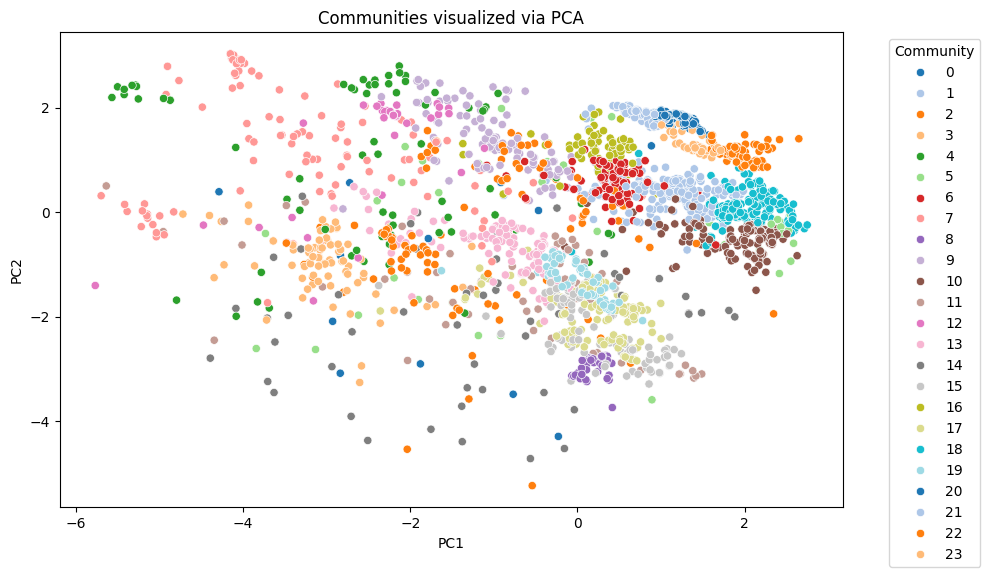

In [ ]:
# ------------------------------------------------------------------
# Step 6c: PCA Visualization of Communities
# ------------------------------------------------------------------

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=community_labels,
    palette="tab20",
    legend="full"
)
plt.title("Communities visualized via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Community", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# ------------------------------------------------------------------
# Step 8: Numeric Evaluation of Community Clustering (Silhouette Score)
# ------------------------------------------------------------------

from sklearn.metrics import silhouette_score

# Calculate silhouette score for the detected communities
sil_score = silhouette_score(X_scaled, community_labels, metric='euclidean')

print(f"Silhouette Score of Community Clustering: {sil_score:.4f}")

# Interpretation:
# - Score ranges from -1 to 1
# - Closer to 1: well-separated, dense clusters
# - Around 0: overlapping clusters
# - Negative: points assigned to wrong clusters


Silhouette Score of Community Clustering: 0.2109


/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
